In [1]:
import cv2
from matplotlib import pyplot as plt
import imutils
import random
import json
import os
from shutil import copyfile



%matplotlib inline  

In [2]:
ann = 'data/labels.txt'
img_folder = 'data/depth/'

In [3]:
# read the lables 
with open(ann) as f:
    first_line = f.readline()
    
label = first_line.split()

print label

['seq0_0000_0', '-1', '5', '517', '258', '2']


In [4]:
print img_folder + label[0] + '.pgm'

data/depth/seq0_0000_0.pgm


In [22]:
# parse a string of annotation 
def new_img_ann(line, img_folder , filename):
    
    img = {'object':[]}
    img['filename'] = filename
            
    image = cv2.imread(img_folder + img['filename']+ '.pgm')
    img['width'], img['height'] = image.shape[:2]
    return img
        

In [23]:
def parse_lables (ann, img_folder, labels=[]):
    all_imgs = []
    seen_labels = {}
    
    with open(ann) as f:
        lines = f.readlines()
        
        
    img = new_img_ann(sorted(lines)[0], img_folder , sorted(lines)[0].split()[0] + '.pgm')
#     prev = img
    
    for line in sorted(lines):
        split_line = line.split()
            
        filename =  split_line[0] 
        
        
#         if the image is new - create a new one, in not - add to the exsisting one
        if filename != img['filename']:
           
            if len(img['object']) > 0:
                all_imgs += [img]
            
            img = new_img_ann(line, img_folder , filename)
            
            
            
            
        
        
#         read the box annotation
        obj = {}
        obj['xmin'] = int(round(float(split_line[1])))
        obj['ymin'] = int(round(float(split_line[2])))
        
        obj['box_height'] = int(round(float(split_line[3])))
        obj['box_width'] = int(round(float(split_line[4])))
        
        obj['xmax'] = int(round(float(split_line[3]))) + int(round(float(split_line[1])))
        obj['ymax'] = int(round(float(split_line[4]))) + int(round(float(split_line[2])))
        
        obj['label'] = split_line[5]
        
        img['object'] += [obj]
        
#         prev = img # previous object filename
        
        
        
        if obj['label'] in seen_labels:
            seen_labels[obj['label']] += 1
        else:
            seen_labels[obj['label']] = 1
    
    
       
    
    return all_imgs, seen_labels

In [24]:
images, seen_labels = parse_lables(ann, img_folder, labels=[])

AttributeError: 'NoneType' object has no attribute 'shape'

In [25]:
seen_labels

{'1': 2396, '2': 2102}

In [9]:
names=[]
for r in images:
    names += [r['filename']]
    
print len(names)    
print len(set(names))
print len(images)

# len(set([i['filename'] in images]))

2349
2349
2349


In [ ]:
def pr(x): print x

In [ ]:
[pr(i['filename']) for i in images[:2]]

In [10]:
idx = random.randint(0, len(images))
print(idx)
images[idx]

2149


{'filename': 'seq0_1000_2.pgm',
 'height': 640,
 'object': [{'box_height': 167,
   'box_width': 83,
   'label': '2',
   'xmax': 392,
   'xmin': 225,
   'ymax': 313,
   'ymin': 230},
  {'box_height': 147,
   'box_width': 73,
   'label': '2',
   'xmax': 379,
   'xmin': 232,
   'ymax': 263,
   'ymin': 190}],
 'width': 480}

In [13]:
def draw_boxes(ann,img_folder):
    
    img = cv2.imread(img_folder+ann['filename'])


#     image_h, image_w, _ = img.shape

    for box in ann['object']:
       

        cv2.rectangle(img, (box['xmin'],box['ymin']), (box['xmax'],box['ymax']), (155,120*int(box['label']),0), 3)
       
        
    return img         

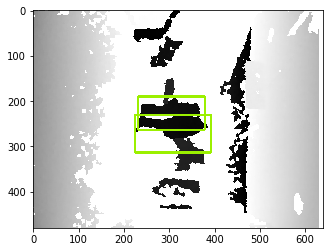

In [15]:
tmp = images[idx]
# img = cv2.imread(tmp['filename'])

# plt.imshow(img) 
plt.imshow(draw_boxes(tmp,img_folder))



In [ ]:
print xrange(0, len(images))

In [16]:
# split into training and validation 

val_inx = random.sample(xrange(len(images)), int(round(len(images)/5)))

# x for x in item if x not in z
val_images = [images[i] for i  in val_inx]
train_images = [images[i] for i in xrange(len(images)) if i not in val_inx]

In [17]:
print len(val_images)
print len(train_images)

469
1880


In [18]:
with open('data/train_ann.json', 'w') as outfile:
    json.dump(train_images, outfile)
    
with open('data/val_ann.json', 'w') as outfile:
    json.dump(val_images, outfile)

In [19]:
# img = open( 'data/depth/seq0_0000_0.pgm', 'wb')
# img = cv2.imdecode(img,1)
# img =  cv2.imread('data/depth/seq0_0000_0.pgm')
# cv2.imwrite('data/test.pgm', img);

error: OpenCV(3.4.3) /Users/travis/build/skvark/opencv-python/opencv/modules/imgcodecs/src/grfmt_pxm.cpp:429: error: (-5:Bad argument) Portable bitmap(.pgm) expects gray image in function 'write'


In [20]:
import os
# rotate and save images into corresponding 
def split_data(img_folder, train_images, val_images):
    
    val_dir = 'data/val/'
    os.makedirs(val_dir)
    
    for i in val_images:
        img =  cv2.imread(img_folder + i['filename'] +'.pgm')
#         img =  cv2.imread()
#         copyfile(img_folder + i['filename'], dst)
        cv2.imwrite( val_dir + i['filename'] , img);
    
    train_dir = 'data/train/'
    os.makedirs(train_dir)
    
    for i in val_images:
#          img = open(img_folder + i['filename'], 'wb')
        img =  cv2.imread(img_folder + i['filename'] + '.pgm')
        cv2.imwrite( train_dir + i['filename'], img);
    
    
    return 0
    
    

In [21]:
split_data(img_folder, train_images, val_images)

0

In [ ]:
# rotate the images  90 degrees

 
# read image as grey scale
img = cv2.imread('data/depth/seq0_0000_0.pgm')

plt.imshow(img) 
# plt.title('original')

# Draw a diagonal blue line with thickness of 5 px
# boximg = cv2.rectangle(img,(-1,5),(-1+517,5+258),(0,255,0),3)
# plt.imshow(boximg)
    
    
# cv2.drawContours(img,[box],0,(0,0,255),2)


# get image height, width
(h, w) = img.shape[:2]

# calculate the center of the image
center = (w / 2, h / 2)
 



In [ ]:
# Perform the counter clockwise rotation holding at the center
# 90 degrees
# M = cv2.getRotationMatrix2D(center, 90, 1.0)
# rotated90 = cv2.warpAffine(img, M, (h, w))
 
# cv2.imwrite( "data/rotated.png", rotated90 );

# plt.imshow(rotated90) 
# plt.title('rotated')

In [ ]:
rotated = imutils.rotate_bound(img, 270)


plt.imshow(rotated) 
plt.title('rotated')

In [ ]:
# cv2.imshow('Original Image',img)
# cv2.waitKey(0) # waits until a key is pressed
# cv2.destroyAllWindows() # destroys the window showing image
 
cv2.imshow('Image rotated by 90 degrees',rotated90)
cv2.waitKey(0) # waits until a key is pressed
cv2.destroyAllWindows() # destroys the window showing image
 

In [ ]:
f = open(annot,'r')
while True:
    text = f.readline()
    if 'rawr' in text:
        print text

In [ ]:
from os import listdir
from os.path import isfile, join
all = [f for f in listdir('data/')]

In [ ]:
print onlyfiles

In [ ]:
# randomly split to  test/validation making sure we have all the labels